# **Analisis de series temprales en la atención al público**

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import acf #funcion de autocorrelacion


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm

In [2]:

# Lee el archivo Excel en un DataFrame de pandas
data = pd.read_excel("ST_ATENCION1.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(data.head())

       FECHA  CC  WAPP  TP  TAD  PP
0 2022-01-03  45     0  37   31   4
1 2022-01-04  63     0  24   24   5
2 2022-01-05  63     0  39   18  12
3 2022-01-06  71     0  33   26   5
4 2022-01-07  58     0  29    9   6


In [3]:
data.dtypes

FECHA    datetime64[ns]
CC                int64
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [4]:
data.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data.head()

,CC,WAPP,TP,TAD,PP
FECHA,,,,,
2022-01-03,45,0,37,31,4
2022-01-04,63,0,24,24,5
2022-01-05,63,0,39,18,12
2022-01-06,71,0,33,26,5
2022-01-07,58,0,29,9,6


In [5]:
data.isna().sum()

CC      0
WAPP    0
TP      0
TAD     0
PP      0
dtype: int64

---
### **Graficamos la serie temporal**

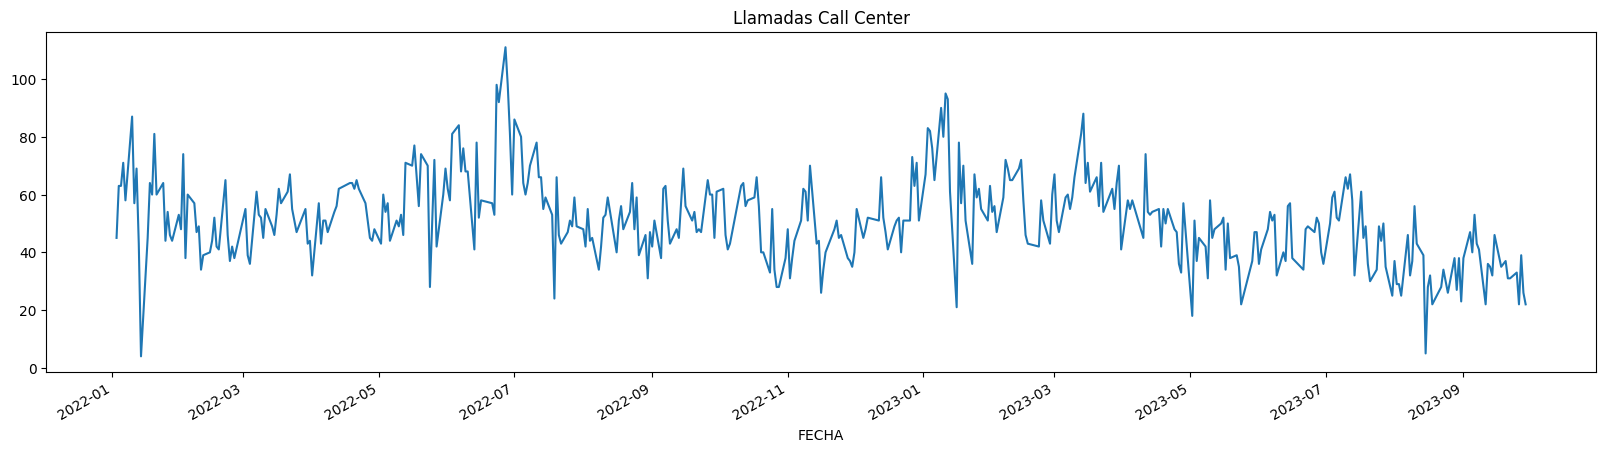

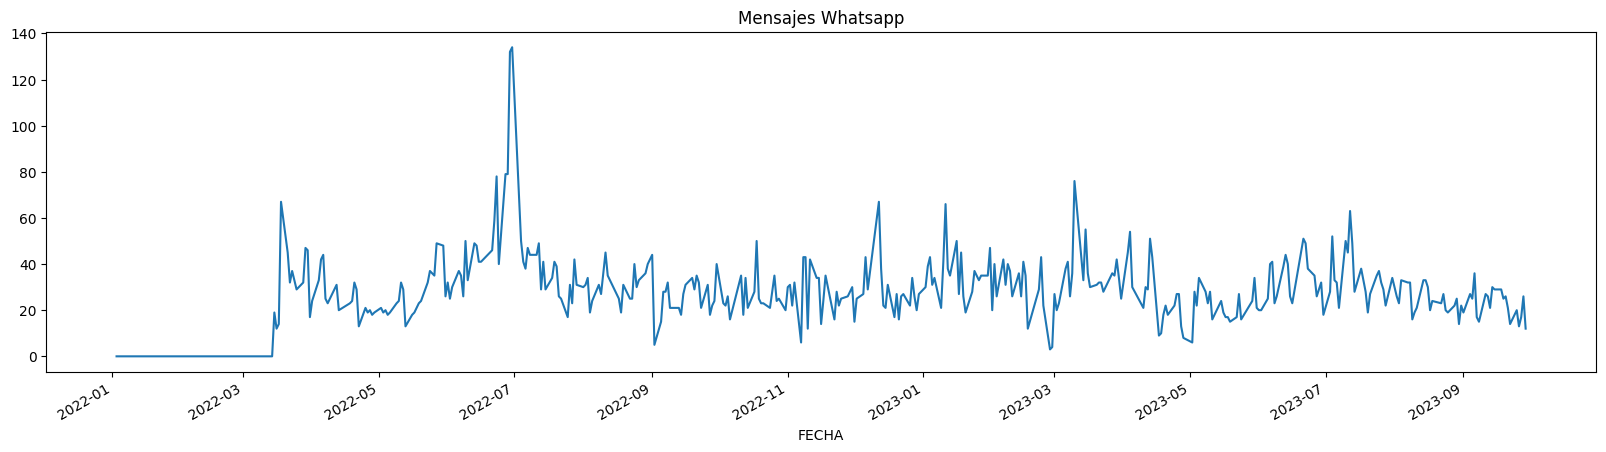

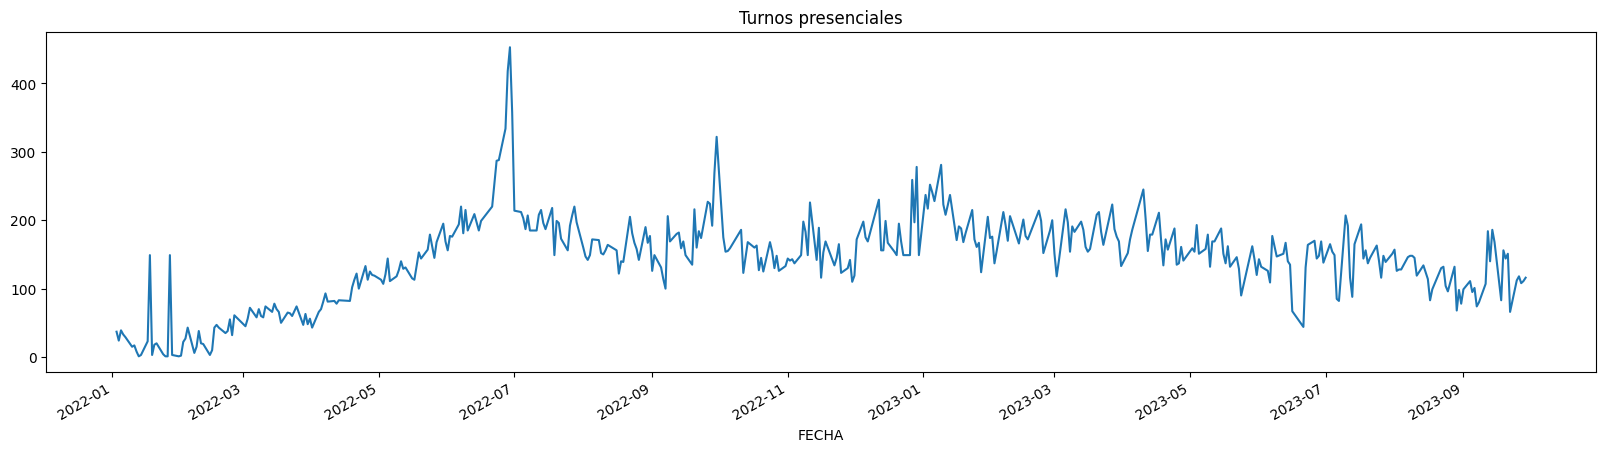

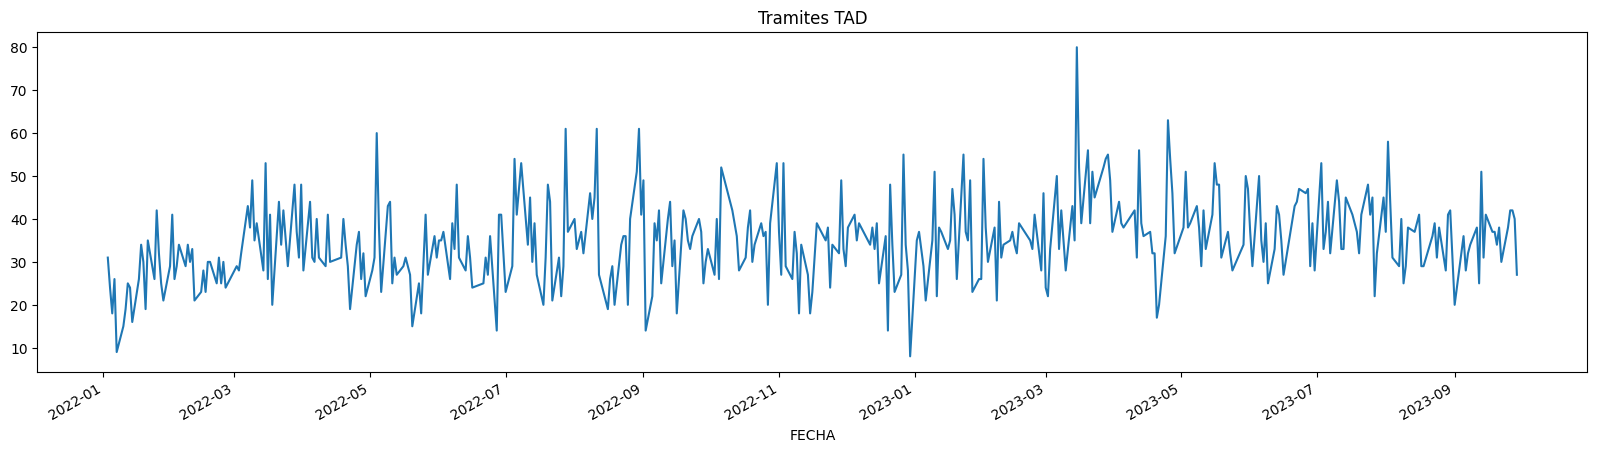

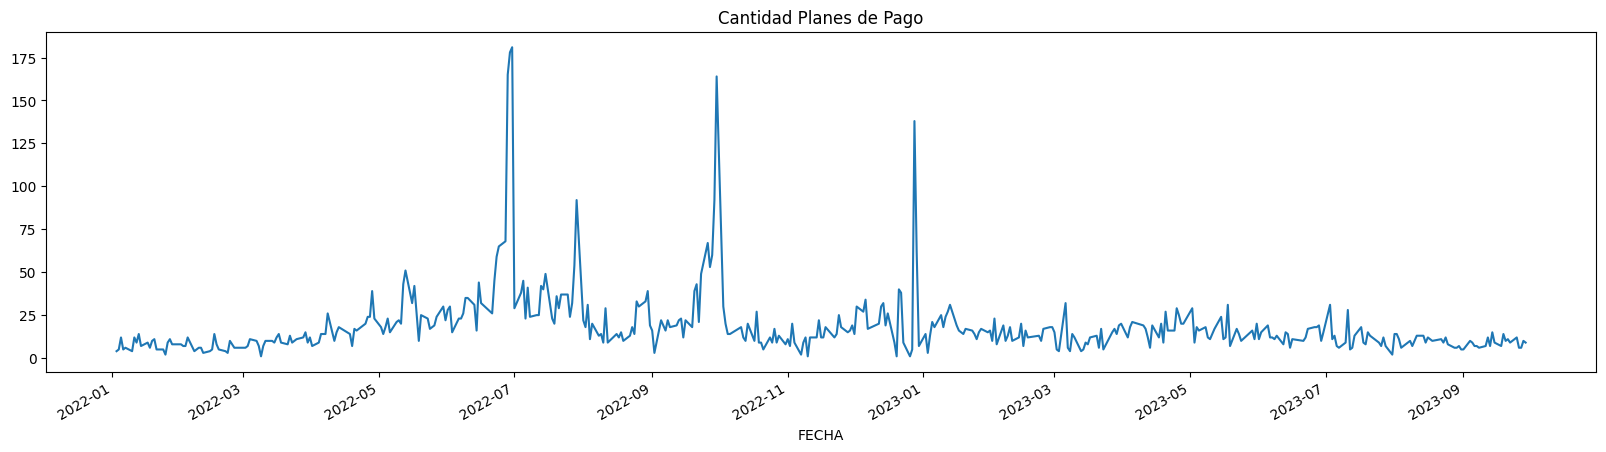

In [6]:
data.CC.plot(figsize=(20,5), title = "Llamadas Call Center")
plt.show()
data.WAPP.plot(figsize=(20,5), title = "Mensajes Whatsapp")
plt.show()
data.TP.plot(figsize=(20,5), title = "Turnos presenciales")
plt.show()
data.TAD.plot(figsize=(20,5), title = "Tramites TAD")
plt.show()
data.PP.plot(figsize=(20,5), title = "Cantidad Planes de Pago")
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación**

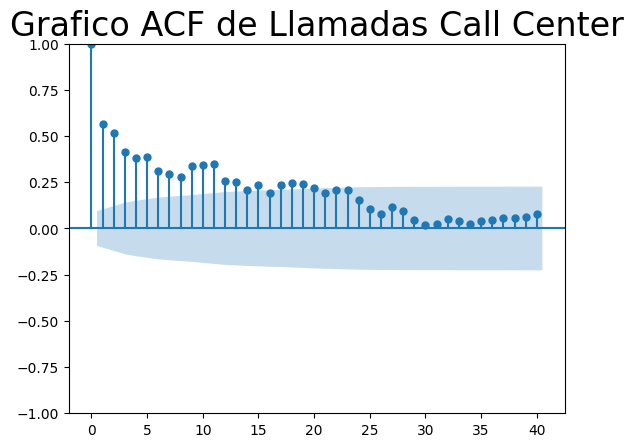

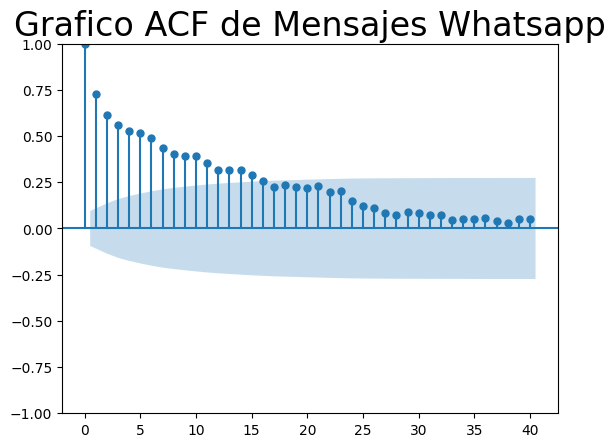

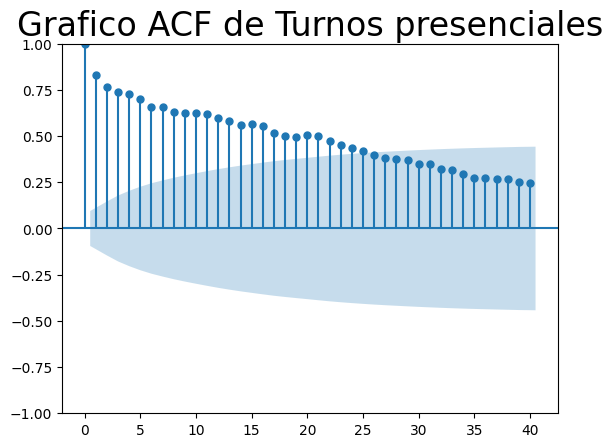

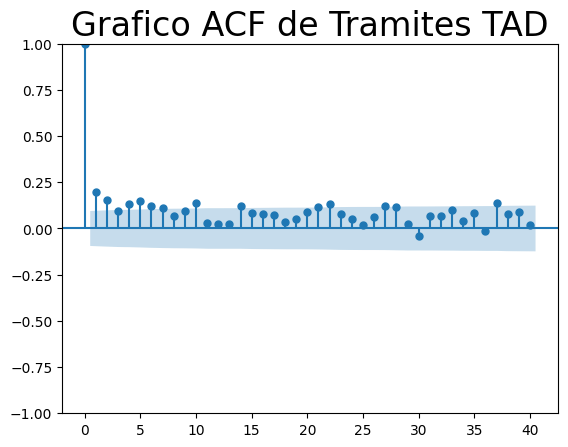

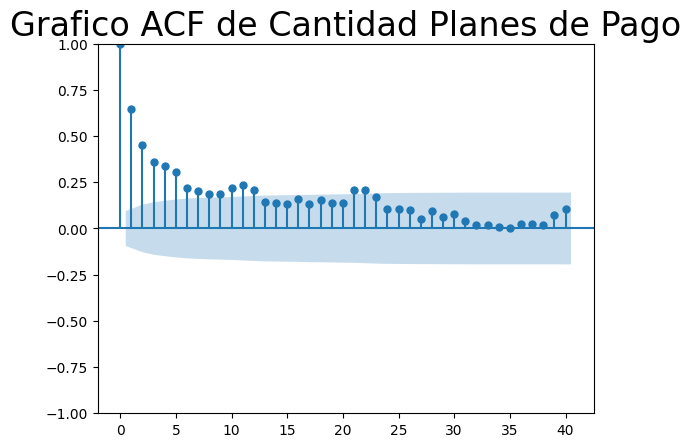

In [7]:
plot_acf(data.CC,lags=40)
plt.title("Grafico ACF de Llamadas Call Center", size= 24)
plt.show()
plot_acf(data.WAPP,lags=40)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_acf(data.TP,lags=40)
plt.title("Grafico ACF de Turnos presenciales", size= 24)
plt.show()
plot_acf(data.TAD,lags=40)
plt.title("Grafico ACF de Tramites TAD", size= 24)
plt.show()
plot_acf(data.PP,lags=40)
plt.title("Grafico ACF de Cantidad Planes de Pago", size= 24)
plt.show()



---
---
---

In [9]:
# Lee el archivo Excel en un DataFrame de pandas
data1 = pd.read_excel("ST_ATENCION1.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(data1.head())

       FECHA  CC  WAPP  TP  TAD  PP
0 2022-01-03  45     0  37   31   4
1 2022-01-04  63     0  24   24   5
2 2022-01-05  63     0  39   18  12
3 2022-01-06  71     0  33   26   5
4 2022-01-07  58     0  29    9   6


In [10]:
data1.dtypes

FECHA    datetime64[ns]
CC                int64
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [11]:
#data1['FECHA'] = pd.to_datetime(data1['FECHA'])


In [12]:
data1.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data1.head()

,CC,WAPP,TP,TAD,PP
FECHA,,,,,
2022-01-03,45,0,37,31,4
2022-01-04,63,0,24,24,5
2022-01-05,63,0,39,18,12
2022-01-06,71,0,33,26,5
2022-01-07,58,0,29,9,6


In [13]:
data1.head()

,CC,WAPP,TP,TAD,PP
FECHA,,,,,
2022-01-03,45,0,37,31,4
2022-01-04,63,0,24,24,5
2022-01-05,63,0,39,18,12
2022-01-06,71,0,33,26,5
2022-01-07,58,0,29,9,6


---
### **Graficamos la serie temporal**

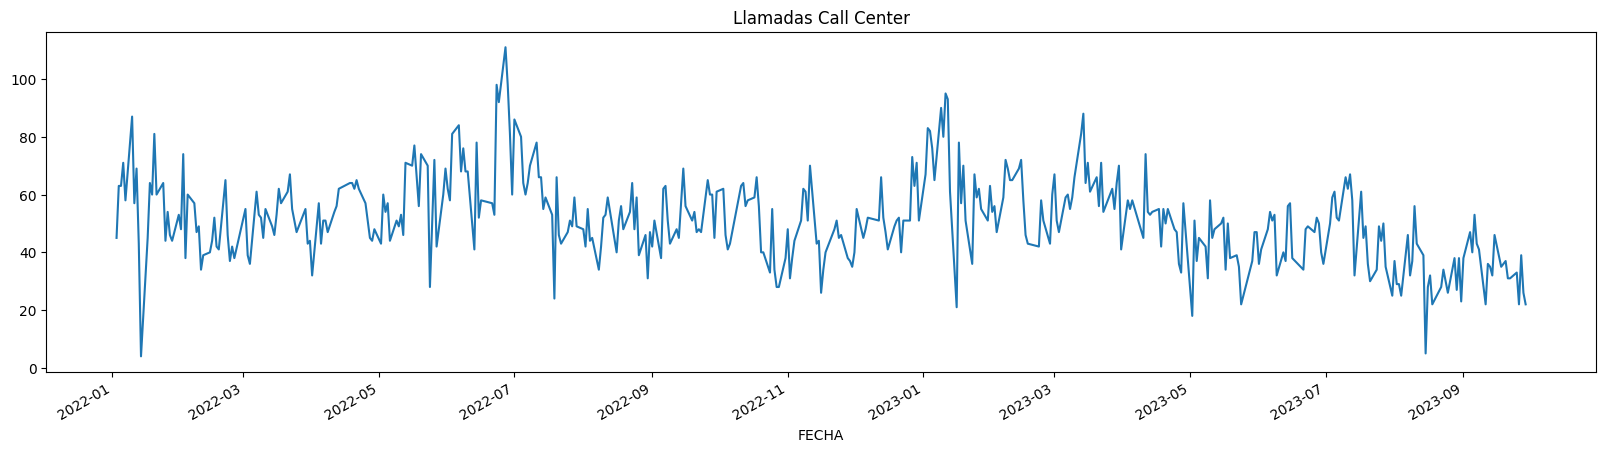

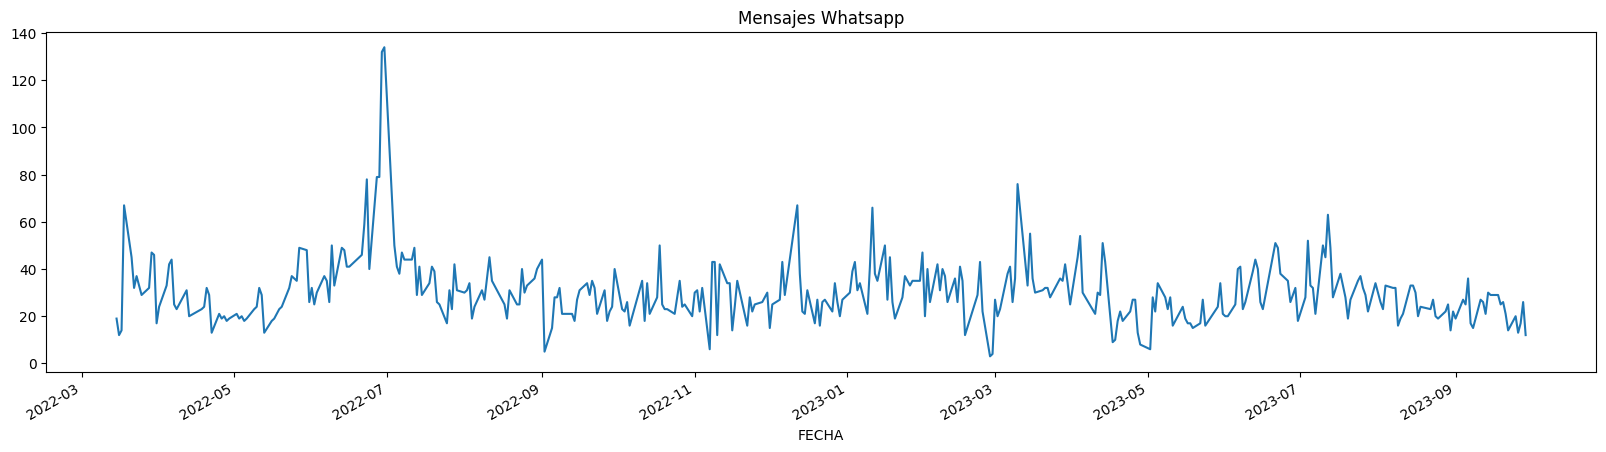

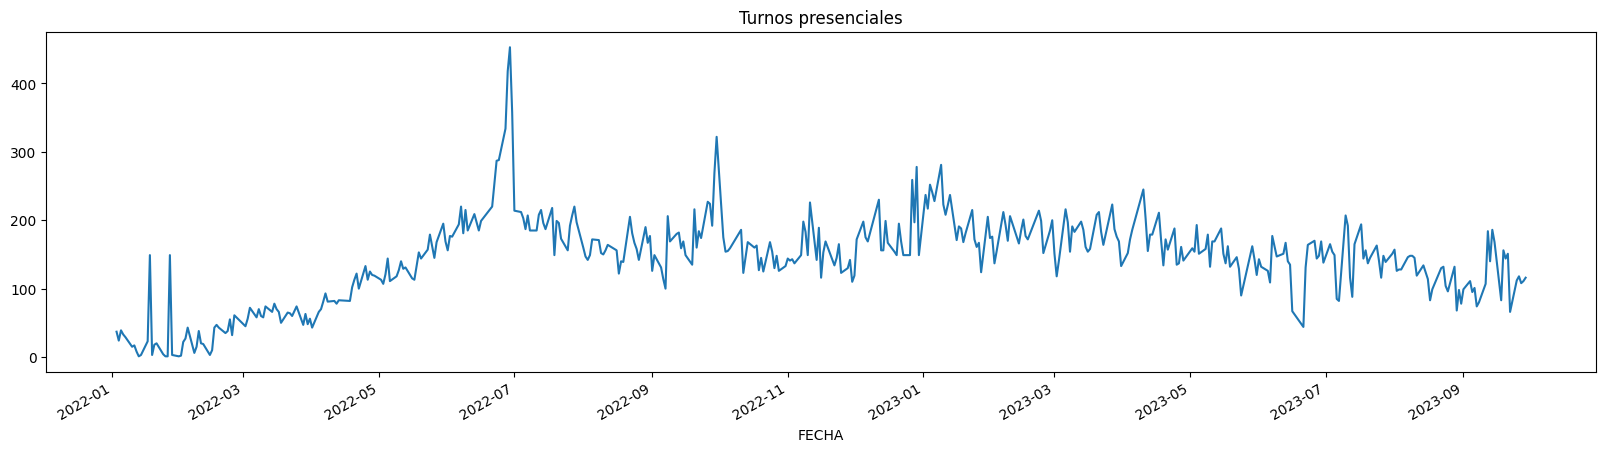

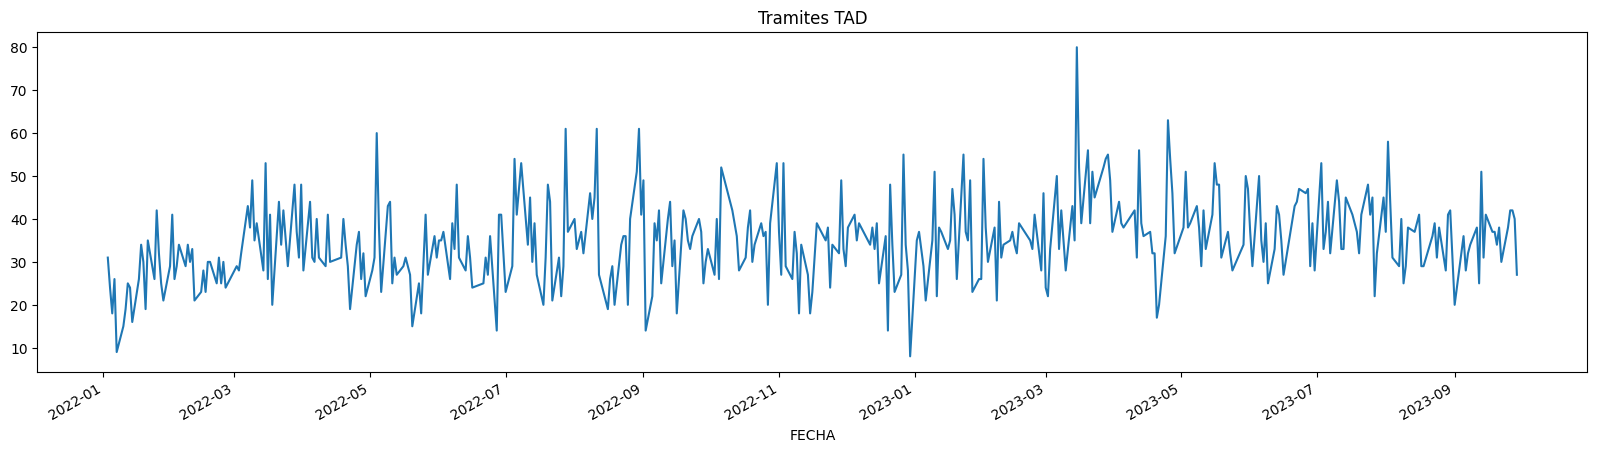

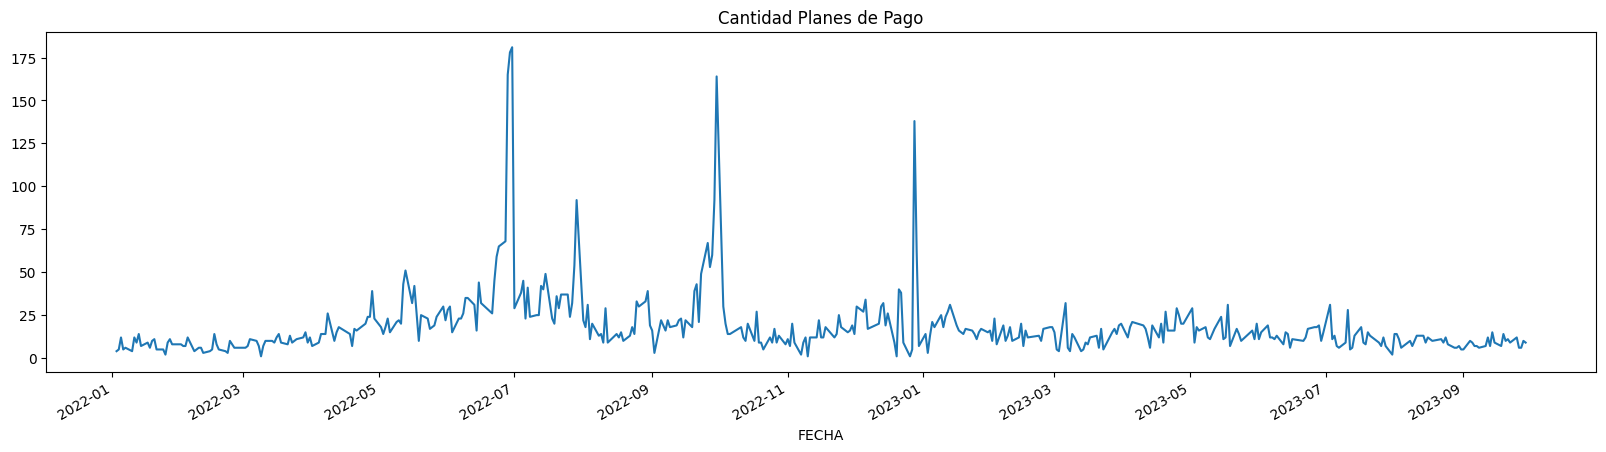

In [14]:
data1.CC.plot(figsize=(20,5), title = "Llamadas Call Center")
plt.show()
data1["WAPP"][49:].plot(figsize=(20,5), title = "Mensajes Whatsapp")
plt.show()
data1.TP.plot(figsize=(20,5), title = "Turnos presenciales")
plt.show()
data1.TAD.plot(figsize=(20,5), title = "Tramites TAD")
plt.show()
data1.PP.plot(figsize=(20,5), title = "Cantidad Planes de Pago")
plt.show()

---
### **Descomposición multiplicativa**

Para visualizar y analizar las componentes de la serie de tiempo descompuesta, lo que puede ayudar a comprender la estructura de los datos y los patrones estacionales y de tendencia que pueden estar presentes. 

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

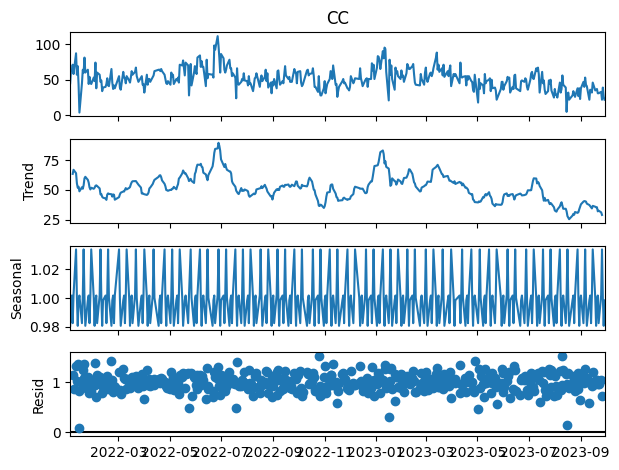

In [16]:

multiplicativeCC = seasonal_decompose(data1.CC, model = "multiplicative", period=7)
multiplicativeCC.plot()
plt.show()



---
### **Representación gráfica de la Función de Autocorrelación**

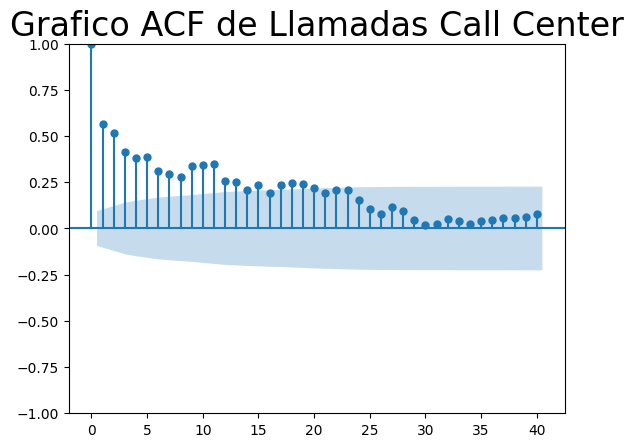

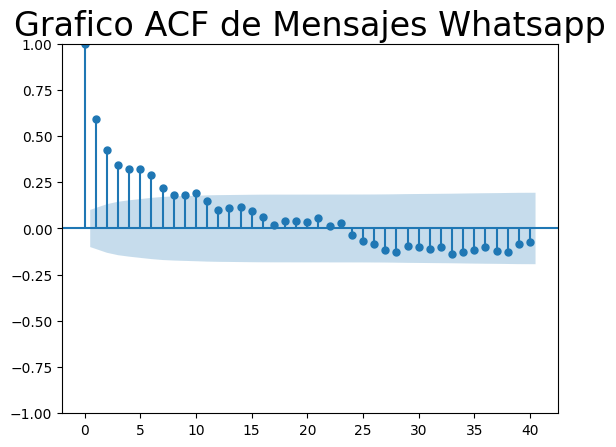

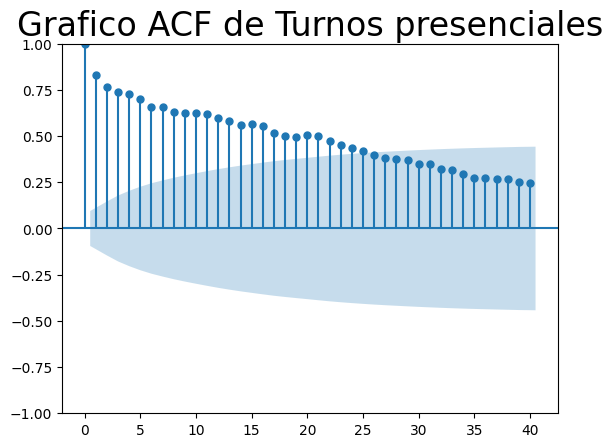

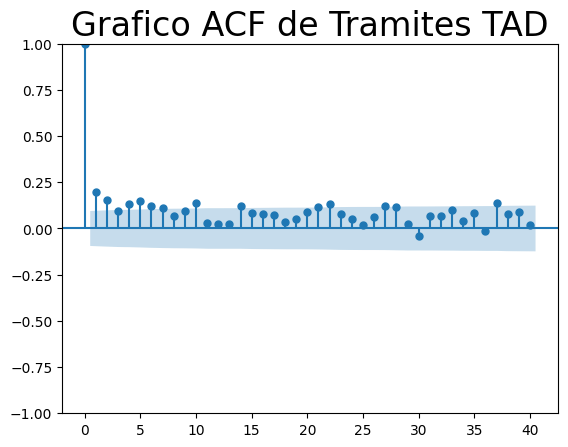

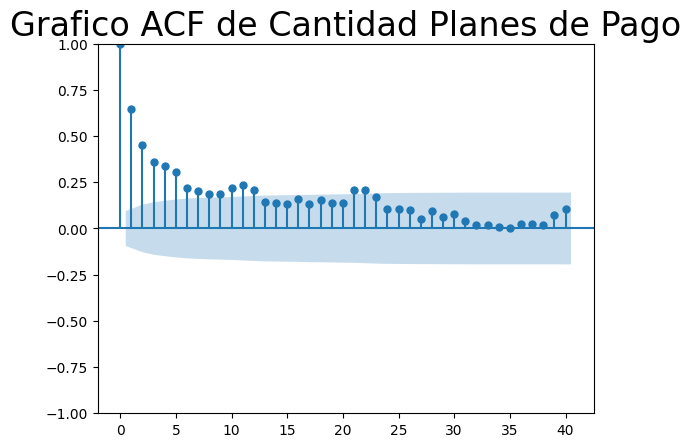

In [17]:
plot_acf(data1.CC,lags=40)
plt.title("Grafico ACF de Llamadas Call Center", size= 24)
plt.show()
plot_acf(data1["WAPP"][49:],lags=40)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_acf(data1.TP,lags=40)
plt.title("Grafico ACF de Turnos presenciales", size= 24)
plt.show()
plot_acf(data1.TAD,lags=40)
plt.title("Grafico ACF de Tramites TAD", size= 24)
plt.show()
plot_acf(data1.PP,lags=40)
plt.title("Grafico ACF de Cantidad Planes de Pago", size= 24)
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación Parcial**

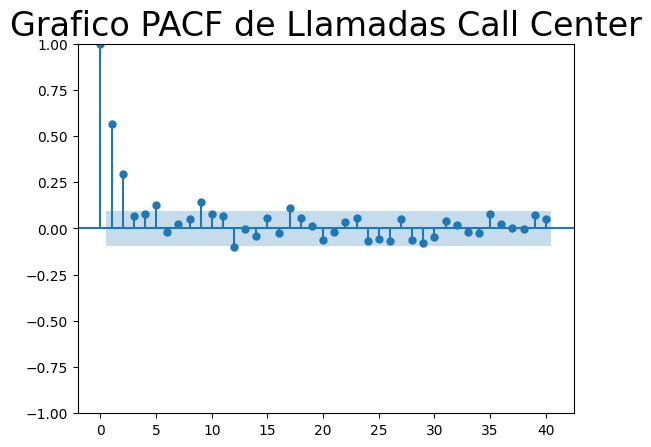

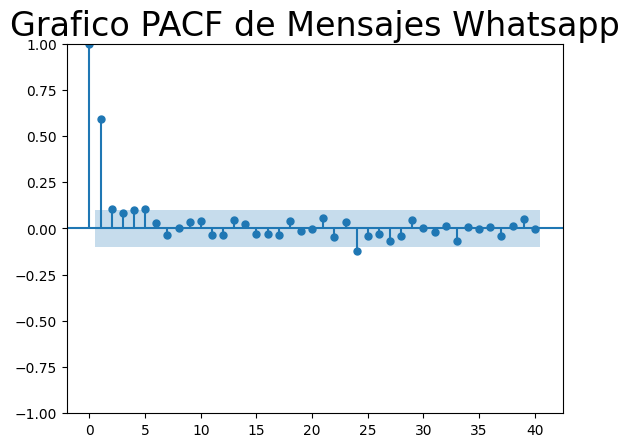

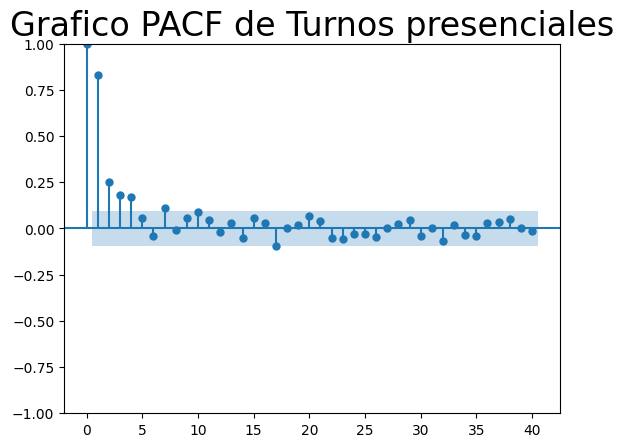

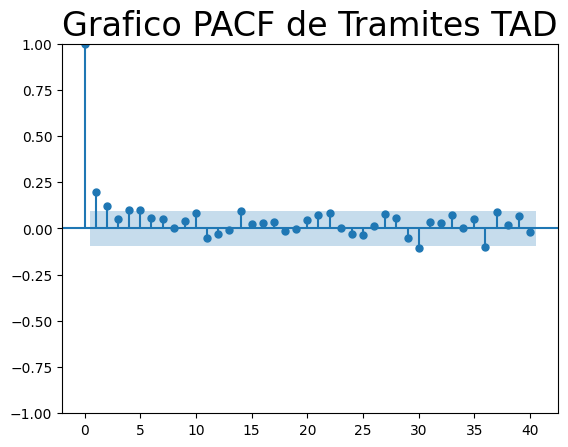

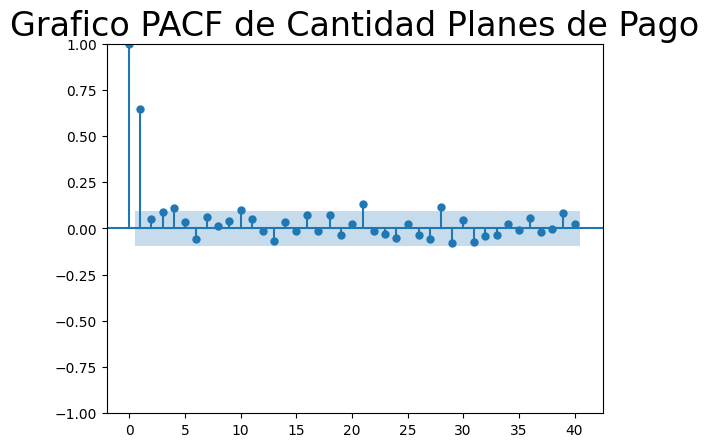

In [18]:
plot_pacf(data1.CC,lags=40)
plt.title("Grafico PACF de Llamadas Call Center", size= 24)
plt.show()
plot_pacf(data1["WAPP"][49:],lags=40)
plt.title("Grafico PACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_pacf(data1.TP,lags=40)
plt.title("Grafico PACF de Turnos presenciales", size= 24)
plt.show()
plot_pacf(data1.TAD,lags=40)
plt.title("Grafico PACF de Tramites TAD", size= 24)
plt.show()
plot_pacf(data1.PP,lags=40)
plt.title("Grafico PACF de Cantidad Planes de Pago", size= 24)
plt.show()

---
---
## **4. Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias**

--- 
### **TEST de Dickey Fuller**

In [19]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data1.CC, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-2.1013687061420208,
 0.24396459417791777,
 16,
 412,
 {'1%': -3.4463221132914486,
  '5%': -2.8685808072418824,
  '10%': -2.570520529031954},
 3135.777256208196)

Basándonos en el valor p de 0.2439645941779175 y los valores críticos, no hay suficiente evidencia para rechazar la hipótesis nula de no estacionariedad en tu serie de tiempo. Esto sugiere que la serie de tiempo podría no ser estacionaria en este nivel de significancia. 

In [20]:
tsa.adfuller(data1["WAPP"][49:], maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.740535928304828,
 7.057244224841168e-05,
 4,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 2788.515168093619)

 Los resultados sugieren que la serie de tiempo *MENSAJES WHATSAPP* es estacionaria, ya que el p-valor es muy pequeño y el estadístico ADF es lo suficientemente extremo como para rechazar la hipótesis nula de no estacionariedad en todos los niveles de significancia.

In [21]:
tsa.adfuller(data1.TP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-2.720071010378734,
 0.0706290378826479,
 9,
 419,
 {'1%': -3.4460536145702383,
  '5%': -2.868462751982839,
  '10%': -2.570457599182051},
 3992.4271333684865)

 Los resultados sugieren que la serie de tiempo *TURNOS PRESENCIALES* no es estacionaria, ya que el p-valor es mayor que 0.05 no se puede rechazar la hipótesis nula de no estacionariedad 

In [22]:
tsa.adfuller(data1.TAD, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-11.60162839285131,
 2.640276811120739e-21,
 1,
 427,
 {'1%': -3.445757604526768,
  '5%': -2.8683325885102855,
  '10%': -2.5703882165206853},
 2996.7825856750023)

 Los resultados sugieren que la serie de tiempo *TRAMITES A DISTANCIA* es estacionaria, ya que el p-valor es muy pequeño y el estadístico ADF es lo suficientemente extremo como para rechazar la hipótesis nula de no estacionariedad en todos los niveles de significancia.

In [23]:
tsa.adfuller(data1.PP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.8747718128446165,
 3.178469770919306e-07,
 3,
 425,
 {'1%': -3.445830555854264,
  '5%': -2.8683646683004276,
  '10%': -2.570405316262976},
 3418.691097446147)

 Los resultados sugieren que la serie de tiempo *PLANES DE PAGO* es estacionaria, ya que el p-valor es muy pequeño y el estadístico ADF es lo suficientemente extremo como para rechazar la hipótesis nula de no estacionariedad en todos los niveles de significancia.

**RESUMEN TEST DICKEY FULLER:**

CALL CENTER (CC) y TURNOS PRESENCIALES (TP) son series no estacionarias.

PLANES DE PAGO (PP), TRAMITES A DISTANCIA (TAD), y WHATSAPP (WAPP) son series estacionarias

----
### **TEST KPSS** para evaluar estacionariedad

In [24]:
from statsmodels.tsa.stattools import kpss

In [25]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [26]:
kpss_test(data1.CC)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9192245711164564
p-valor: 0.01
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.25262410660288226
p-valor: 0.01
numero de lags: 10
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el test KPSS, la serie CALL CENTER no es estacionaria, y hay que hacer una diferenciación

In [27]:
kpss_test(data1["WAPP"][49:]) #data1.WAPP es la variable

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.2857467127776876
p-valor: 0.1
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.06194459823169663
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Se valida con el test KPSS que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [28]:
kpss_test(data1.TP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.8789591389582808
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.5760280204531608
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el test KPSS, la serie TURNOS PRESENCIALES no es estacionaria, y hay que hacer una diferenciación

In [29]:
kpss_test(data1.TAD)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 1.5813196149381574
p-valor: 0.01
numero de lags: 7
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.14338653675178933
p-valor: 0.05483974675594566
numero de lags: 5
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el TEST KPSS la serie TAD no es estacionaria, y hay que aplicar una diferenciación.

En resumen, los resultados de las pruebas KPSS indican que:

1. Bajo el supuesto de que los datos son estacionarios alrededor de una constante, la serie de tiempo es no estacionaria. Se requiere al menos una diferencia para lograr la estacionariedad.

2. Bajo el supuesto de que los datos son estacionarios alrededor de una tendencia, la serie de tiempo se considera estacionaria sin necesidad de diferenciación adicional.


In [30]:
kpss_test(data1.PP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.5047946564144291
p-valor: 0.0405867890958493
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.28535914113265437
p-valor: 0.01
numero de lags: 10
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_936\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el TEST KPSS la serie PLAN DE PAGOS no es estacionaria, y hay que aplicar una diferenciación

**RESUMEN TEST KPSS:**

CALL CENTER (CC), TURNOS PRESENCIALES (TP), PLANES DE PAGO (PP) y TRAMITES A DISTANCIA (TAD) son series no estacionarias.

WHATSAPP (WAPP) son series estacionarias

---
### **TEST PHILLIP PERRON** para evaluar estacionariedad

In [31]:
from arch.unitroot import PhillipsPerron

In [32]:
def Phillips_Perron(series, **k):

    params = {'n':'No incluye término independiente ni lineal',
              'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [33]:
Phillips_Perron(data1.CC)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -1.7807769926143742
p-valor: 0.07121584323851378
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -14.206309015850245
p-valor: 1.752399696618312e-26
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -14.900334535371496
p-valor: 2.461609953777446e-22
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
  

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el test Phillips Terron, la serie CALL CENTER no es estacionaria, pero no hay que hacer una diferenciación

In [34]:
Phillips_Perron(data1["WAPP"][49:])

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -3.2826823515152976
p-valor: 0.0010394347068614844
numero de lags: 17
Valor Critico:
   1% : -2.5716644588940483
   5% : -1.941731560051895
   10% : -1.6161376368621574
Resultado: La serie es estacionaria


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]


PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -11.45863242953552
p-valor: 5.625490417348521e-21
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -11.562162253188461
p-valor: 2.09519289511337e-18
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Se valida con el test Phillip Perron que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [35]:
Phillips_Perron(data1.TP)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -1.4266604705615569
p-valor: 0.14335216719946786
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -7.108234012236368
p-valor: 4.001465493978547e-10
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -7.611142835201936
p-valor: 5.652835217386737e-10
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
   1

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el test Phillip Terron, la serie TURNOS PRESENCIALES no es estacionaria, y hay que hacer una diferenciación

In [36]:
Phillips_Perron(data1.TAD)

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]


Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -2.7453123143892393
p-valor: 0.005887212826933744
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -19.27348530097995
p-valor: 0.0
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -18.961394834354692
p-valor: 0.0
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
   10% : -3.133112833488294
Resultado: La

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el TEST Phillip Terron la serie TAD  es estacionaria, y no hay que aplicar una diferenciación.


In [37]:
Phillips_Perron(data1.PP)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -7.677813161568031
p-valor: 1.7804465990549179e-12
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -10.908804348710792
p-valor: 1.110427931315897e-19
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -10.930098333648829
p-valor: 3.0262925504771196e-17
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
  

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el TEST Phillip Perron la serie PLAN DE PAGOS  es estacionaria, y no hay que aplicar una diferenciación

**RESUMEN TEST PHILLIP PERRON:**

CALL CENTER (CC), TURNOS PRESENCIALES (TP) son series no estacionarias.

WHATSAPP (WAPP), PLANES DE PAGO (PP) y TRAMITES A DISTANCIA (TAD) son series estacionarias

---
##### **CUADRO RESUMEN TESTS DE ESTACIONARIEDAD**



In [38]:
import pandas as pd
data = [
    ["Dickey Fuller", "no", "si", "no", "si", "si"],
    ["KPSS", "no", "si", "no", "si", "no"],
    ["Phillip Perron", "no", "si", "no", "si", "si"]
]

# Encabezados de las columnas
headers = ["Test", "cc", "wapp", "tp", "tad", "pp"]

# Crear un DataFrame
df = pd.DataFrame(data, columns=headers)

# Mostrar el DataFrame
print(df)


             Test  cc wapp  tp tad  pp
0   Dickey Fuller  no   si  no  si  si
1            KPSS  no   si  no  si  no
2  Phillip Perron  no   si  no  si  si


----
### **¿Cuántas diferenciaciones hay que hacer?**

In [39]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))



In [40]:
estacionario(data1.CC) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [41]:
estacionario(data1["WAPP"][49:]) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
0
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [42]:
estacionario(data1.TP) #variable

Estimado de número de diferencias con ADF test
1
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.2555557576872258, True)


In [43]:
estacionario(data1.TAD) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [44]:
estacionario(data1.PP) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


Validamos que en las series que eran estacionarias, segun el test de Dickey Fuller, no hay que hacer diferenciaciones.
En la serie TURNOS PRESENCIALES que no era estacionaria, hay que hacer una diferenciación.
En la serie CALL CENTER que no era estacionaria, no hay que hacer ninguna diferenciación. 

---
### **HACER DIFERENCIACION**

In [45]:
# DIFERENCIACION DE LA VARIABLE CALL CENTER (CC)

# Opcion 1
data1_diff_CC=data1.CC.copy()
data1_diff_CC=data1_diff_CC.diff(periods = 1)
data1_diff_CC.drop(['2022-01-03'], inplace=True)

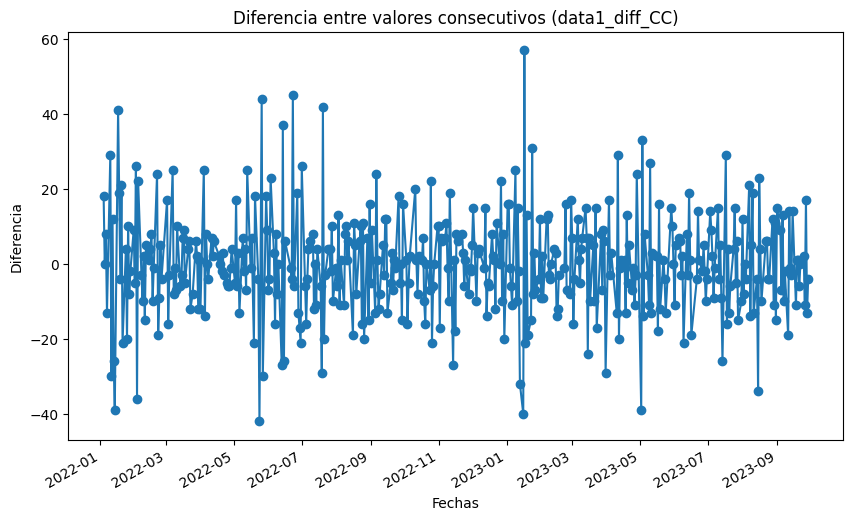

In [46]:
# Traza la Serie data1_diff_CC
data1_diff_CC.plot(figsize=(10, 6), marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Fechas')
plt.ylabel('Diferencia')
plt.title('Diferencia entre valores consecutivos (data1_diff_CC)')

# Muestra el gráfico
plt.show()







In [47]:
# DIFERENCIACION DE LA VARIABLE TURNOS PRESENCIALES (TP)

# Opcion 1
data1_diff_TP=data1.TP.copy()
data1_diff_TP=data1_diff_TP.diff(periods = 1)
data1_diff_TP.drop(['2022-01-03'], inplace=True)

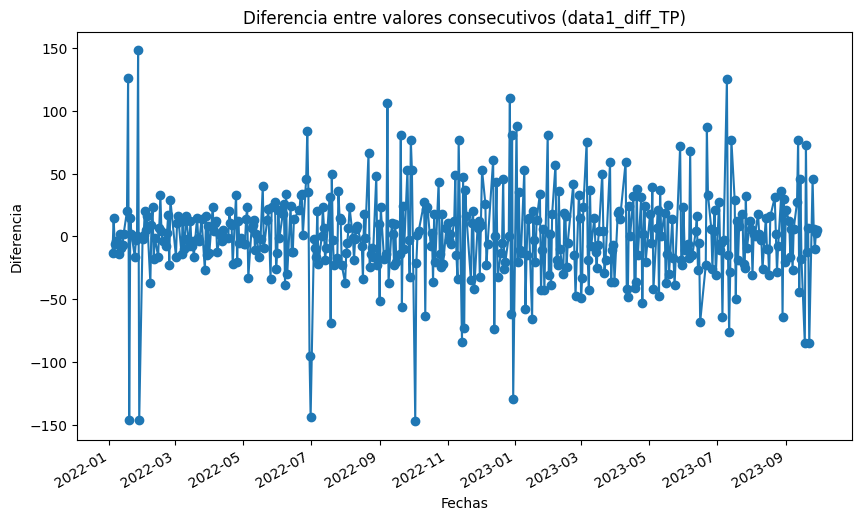

In [48]:
# Traza la Serie data1_diff_CC
data1_diff_TP.plot(figsize=(10, 6), marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Fechas')
plt.ylabel('Diferencia')
plt.title('Diferencia entre valores consecutivos (data1_diff_TP)')

# Muestra el gráfico
plt.show()


---
---
## **5. Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).**

**CALL CENTER (CC)**

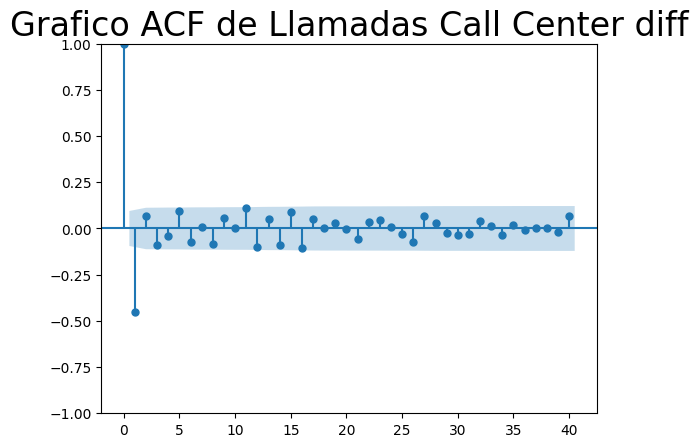

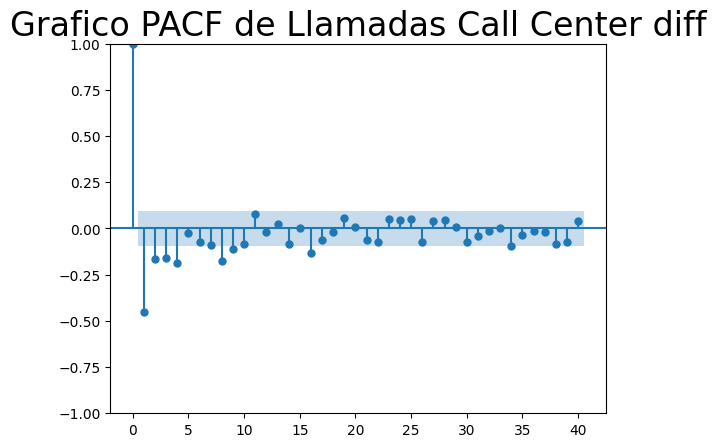

In [49]:
plot_acf(data1_diff_CC,lags=40)
plt.title("Grafico ACF de Llamadas Call Center diff", size= 24)
plt.show()
plot_pacf(data1_diff_CC,lags=40)
plt.title("Grafico PACF de Llamadas Call Center diff", size= 24)
plt.show()

In [50]:
stepwise_fit = auto_arima(data1_diff_CC, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3314.623, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3460.806, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3366.028, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3326.276, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3458.813, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3315.300, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3312.786, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3320.211, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3355.919, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3314.606, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3346.322, Time=0.19 sec


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3309.453, Time=0.51 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3309.572, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3308.843, Time=1.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3316.491, Time=0.60 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=3313.293, Time=1.11 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=3310.744, Time=1.52 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=3309.837, Time=1.18 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3307.264, Time=0.78 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3314.897, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3307.932, Time=0.38 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=3311.255, Time=0.77 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=3309.187, Time=0.91 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3313.067, Time=0.23 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=3308.188, Time=0.85 sec
 ARIMA(4,0,2)(0

In [51]:
model_CC = sm.tsa.arima.ARIMA(data1_diff_CC, order=(3,0,3))
result_CC = model_CC.fit()

result_CC.summary()


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     CC   No. Observations:                  428
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1646.422
Date:                Sat, 04 Nov 2023   AIC                           3308.843
Time:                        20:18:15   BIC                           3341.316
Sample:                             0   HQIC                          3321.668
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0592      0.099     -0.600      0.549      -0.253       0.134
ar.L1         -1.0869      0.194     -5.607      0.000      -1.467      -0.707
ar.L2          0.1380      0.172      0.803      0.422      -0.199       0.475
ar.L3          0.3044      0.060      5.067      0.000       0.187       0.422
ma.L1          0.4659      0.206      2.261      0.024       0.062       0.870
ma.L2         -0.8400      0.047    -18.005      0.000      -0.931      -0.749
ma.L3         -0.3604      0.171     -2.111      0.035      -0.695      -0.026
sigma2       128.0483      7.698     16.635      0.000     112.961     143.135
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.02
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_CC1 = sm.tsa.arima.ARIMA(data1_diff_CC, order=((1,0,1),0,3))
result_CC1 = model_CC1.fit()

result_CC1.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                      CC   No. Observations:                  428
Model:             ARIMA([1, 3], 0, 3)   Log Likelihood               -1650.295
Date:                 Sat, 04 Nov 2023   AIC                           3314.590
Time:                         20:18:16   BIC                           3343.004
Sample:                              0   HQIC                          3325.812
                                 - 428                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0601      0.100     -0.600      0.548      -0.256       0.136
ar.L1         -0.7065      0.386     -1.831      0.067      -1.463       0.050
ar.L3          0.2369      0.087      2.722      0.006       0.066       0.407
ma.L1          0.0656      0.390      0.168      0.866      -0.698       0.829
ma.L2         -0.4418      0.270     -1.635      0.102      -0.971       0.088
ma.L3         -0.3841      0.092     -4.194      0.000      -0.564      -0.205
sigma2       130.4897      7.012     18.608      0.000     116.746     144.234
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                62.11
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model_CC2 = sm.tsa.arima.ARIMA(data1_diff_CC, order=(1,0,4))
result_CC2 = model_CC2.fit()

result_CC2.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     CC   No. Observations:                  428
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1647.207
Date:                Sat, 04 Nov 2023   AIC                           3308.415
Time:                        20:18:17   BIC                           3336.829
Sample:                             0   HQIC                          3319.637
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0608      0.107     -0.570      0.568      -0.270       0.148
ar.L1         -0.8932      0.050    -17.812      0.000      -0.991      -0.795
ma.L1          0.2778      0.066      4.198      0.000       0.148       0.407
ma.L2         -0.5835      0.053    -10.922      0.000      -0.688      -0.479
ma.L3         -0.1464      0.040     -3.685      0.000      -0.224      -0.069
ma.L4         -0.2123      0.046     -4.588      0.000      -0.303      -0.122
sigma2       128.5729      7.691     16.717      0.000     113.499     143.647
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                42.23
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**WHATSAPP (WAPP)**

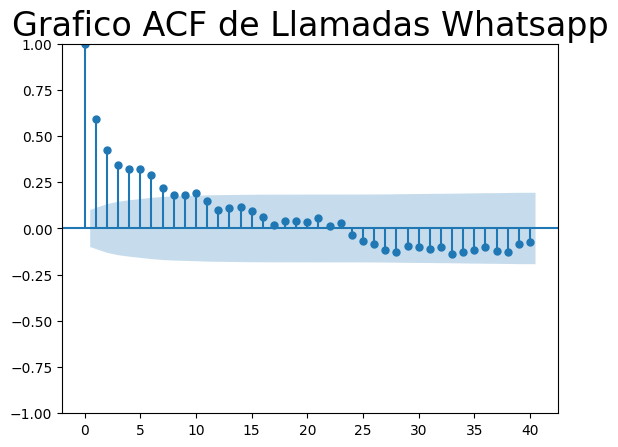

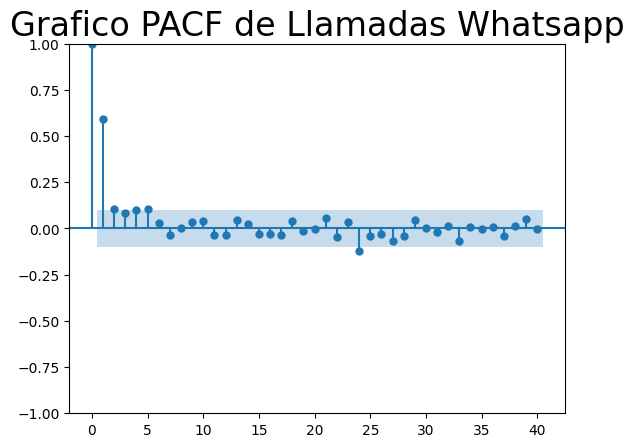

In [54]:
plot_acf(data1["WAPP"][49:],lags=40)
plt.title("Grafico ACF de Llamadas Whatsapp", size= 24)
plt.show()
plot_pacf(data1["WAPP"][49:],lags=40)
plt.title("Grafico PACF de Llamadas Whatsapp", size= 24)
plt.show()

In [55]:
stepwise_fit = auto_arima(data1["WAPP"][49:], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2940.065, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3112.237, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2947.500, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3000.174, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3757.350, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2938.703, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2970.784, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2942.708, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2939.780, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2960.786, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2938.339, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2945.000, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2939.965, Time=0.60 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2944.062, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept

In [56]:
model_WAPP = sm.tsa.arima.ARIMA(data1["WAPP"][49:], order=(2,0,1))
result_WAPP = model_WAPP.fit()

result_WAPP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAPP   No. Observations:                  380
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1464.169
Date:                Sat, 04 Nov 2023   AIC                           2938.339
Time:                        20:18:22   BIC                           2958.040
Sample:                             0   HQIC                          2946.156
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2775      2.762     10.960      0.000      24.863      35.692
ar.L1          1.2388      0.157      7.884      0.000       0.931       1.547
ar.L2         -0.3019      0.107     -2.813      0.005      -0.512      -0.092
ma.L1         -0.7427      0.150     -4.967      0.000      -1.036      -0.450
sigma2       129.9111      5.662     22.943      0.000     118.813     141.009
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               564.68
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model_WAPP1 = sm.tsa.arima.ARIMA(data1["WAPP"][49:], order=(6,0,1))
result_WAPP1 = model_WAPP1.fit()

result_WAPP1.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAPP   No. Observations:                  380
Model:                 ARIMA(6, 0, 1)   Log Likelihood               -1462.701
Date:                Sat, 04 Nov 2023   AIC                           2943.401
Time:                        20:18:23   BIC                           2978.863
Sample:                             0   HQIC                          2957.472
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3198      2.640     11.486      0.000      25.146      35.493
ar.L1          0.0182      1.127      0.016      0.987      -2.190       2.227
ar.L2          0.2921      0.568      0.514      0.607      -0.821       1.405
ar.L3          0.0517      0.070      0.742      0.458      -0.085       0.188
ar.L4          0.0570      0.062      0.923      0.356      -0.064       0.178
ar.L5          0.1110      0.082      1.360      0.174      -0.049       0.271
ar.L6          0.0890      0.100      0.893      0.372      -0.106       0.284
ma.L1          0.4822      1.134      0.425      0.671      -1.741       2.705
sigma2       128.8935      6.483     19.882      0.000     116.187     141.600
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               525.97
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**TURNOS PRESENCIALES (TP)**

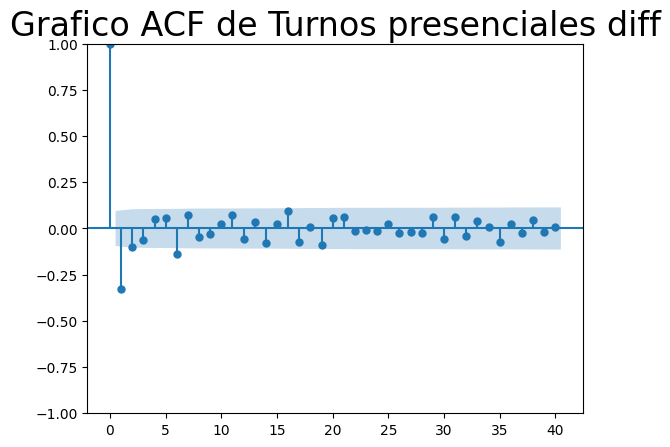

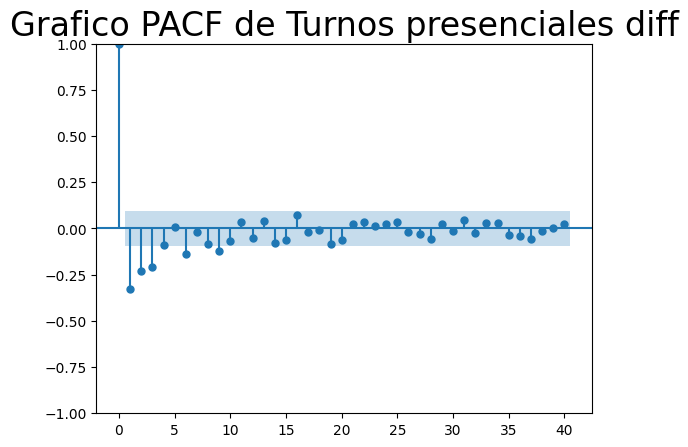

In [58]:
plot_acf(data1_diff_TP,lags=40)
plt.title("Grafico ACF de Turnos presenciales diff", size= 24)
plt.show()
plot_pacf(data1_diff_TP,lags=40)
plt.title("Grafico PACF de Turnos presenciales diff", size= 24)
plt.show()

In [59]:
stepwise_fit = auto_arima(data1_diff_TP, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4294.133, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4248.420, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4210.094, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4292.144, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4197.206, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4199.109, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4199.080, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4199.272, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4227.216, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4195.429, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4208.174, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4246.443, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4197.346, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : 

In [60]:
model_TP = sm.tsa.arima.ARIMA(data1_diff_TP, order=(1,0,1))
result_TP = model_TP.fit()

result_TP.summary()


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     TP   No. Observations:                  428
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2094.603
Date:                Sat, 04 Nov 2023   AIC                           4197.206
Time:                        20:18:26   BIC                           4213.442
Sample:                             0   HQIC                          4203.618
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2082      0.486      0.428      0.668      -0.745       1.161
ar.L1          0.3230      0.047      6.827      0.000       0.230       0.416
ma.L1         -0.8114      0.027    -29.829      0.000      -0.865      -0.758
sigma2      1041.8052     48.690     21.397      0.000     946.374    1137.237
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               162.14
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.59
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model_TP1 = sm.tsa.arima.ARIMA(data1_diff_TP, order=(3,0,1))
result_TP1 = model_TP1.fit()

result_TP1.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     TP   No. Observations:                  428
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -2094.445
Date:                Sat, 04 Nov 2023   AIC                           4200.890
Time:                        20:18:27   BIC                           4225.245
Sample:                             0   HQIC                          4210.509
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2105      0.461      0.456      0.648      -0.694       1.115
ar.L1          0.3507      0.062      5.630      0.000       0.229       0.473
ar.L2          0.0234      0.053      0.439      0.660      -0.081       0.128
ar.L3          0.0284      0.056      0.506      0.613      -0.082       0.138
ma.L1         -0.8432      0.053    -15.789      0.000      -0.948      -0.738
sigma2      1040.9056     48.606     21.415      0.000     945.639    1136.172
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               165.85
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.60
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**TRAMITES A DISTANCIA (TAD)**

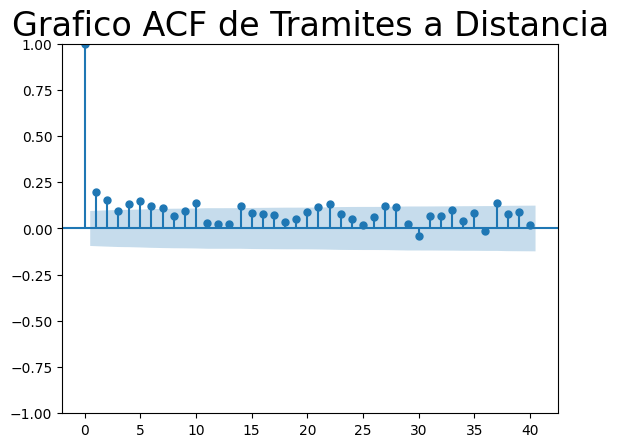

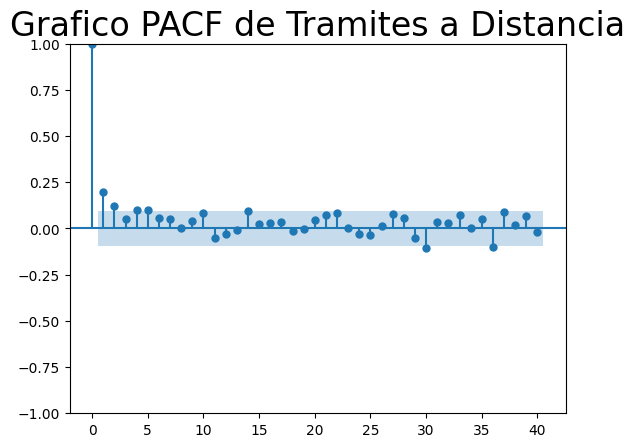

In [62]:
plot_acf(data1["TAD"],lags=40)
plt.title("Grafico ACF de Tramites a Distancia", size= 24)
plt.show()
plot_pacf(data1["TAD"],lags=40)
plt.title("Grafico PACF de Tramites a Distancia", size= 24)
plt.show()

In [63]:
stepwise_fit = auto_arima(data1["TAD"], stationary =True, seasonal= False, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3162.418, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3147.654, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3151.075, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4302.516, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3143.451, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3144.375, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3135.003, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3131.873, Time=0.46 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3134.632, Time=0.66 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3146.127, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3133.546, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 3.355 seconds


In [64]:
model_TAD = sm.tsa.arima.ARIMA(data1["TAD"], order=(1,0,1))
result_TAD = model_TAD.fit()

result_TAD.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TAD   No. Observations:                  429
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1560.635
Date:                Sat, 04 Nov 2023   AIC                           3129.270
Time:                        20:18:31   BIC                           3145.516
Sample:                             0   HQIC                          3135.686
                                - 429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4063      1.797     19.150      0.000      30.885      37.928
ar.L1          0.9769      0.016     61.994      0.000       0.946       1.008
ma.L1         -0.9027      0.030    -29.722      0.000      -0.962      -0.843
sigma2        84.4899      4.629     18.253      0.000      75.418      93.562
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):                46.20
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.48
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
model_TAD1 = sm.tsa.arima.ARIMA(data1["TAD"], order=(2,0,1))
result_TAD1 = model_TAD1.fit()

result_TAD1.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TAD   No. Observations:                  429
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1559.752
Date:                Sat, 04 Nov 2023   AIC                           3129.505
Time:                        20:18:31   BIC                           3149.812
Sample:                             0   HQIC                          3137.524
                                - 429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2039      2.098     16.304      0.000      30.092      38.316
ar.L1          1.0588      0.059     18.012      0.000       0.944       1.174
ar.L2         -0.0726      0.055     -1.326      0.185      -0.180       0.035
ma.L1         -0.9303      0.029    -32.378      0.000      -0.987      -0.874
sigma2        84.1262      4.601     18.285      0.000      75.109      93.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                47.39
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.50
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**PLAN DE PAGOS (PP)**

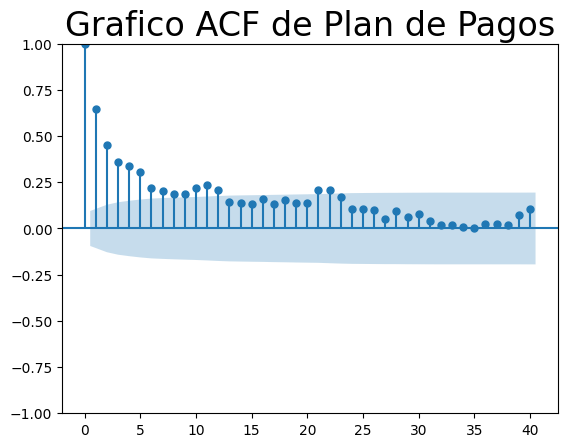

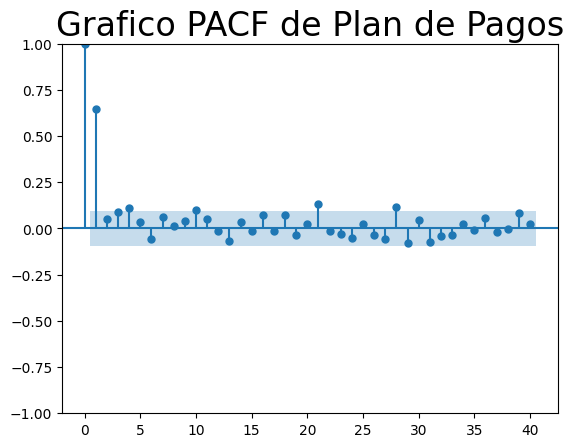

In [66]:
plot_acf(data1["PP"],lags=40)
plt.title("Grafico ACF de Plan de Pagos", size= 24)
plt.show()
plot_pacf(data1["PP"],lags=40)
plt.title("Grafico PACF de Plan de Pagos", size= 24)
plt.show()

In [67]:
stepwise_fit = auto_arima(data1["PP"], stationary=True, seasonal=False, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3561.192, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3798.627, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3566.044, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3638.026, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4060.607, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3562.212, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3559.523, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3566.477, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3566.954, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3561.215, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3565.485, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3561.618, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.978 seconds


In [68]:
model_PP = sm.tsa.arima.ARIMA(data1["PP"], order=(2,0,1))
result_PP = model_PP.fit()

result_PP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PP   No. Observations:                  429
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1774.762
Date:                Sat, 04 Nov 2023   AIC                           3559.523
Time:                        20:18:36   BIC                           3579.831
Sample:                             0   HQIC                          3567.543
                                - 429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7328      7.777      2.280      0.023       2.491      32.975
ar.L1          1.4828      0.069     21.367      0.000       1.347       1.619
ar.L2         -0.5001      0.056     -8.906      0.000      -0.610      -0.390
ma.L1         -0.9021      0.057    -15.847      0.000      -1.014      -0.791
sigma2       229.1579      5.196     44.105      0.000     218.975     239.341
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             14814.17
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
model_PP1 = sm.tsa.arima.ARIMA(data1["PP"], order=(5,0,1))
result_PP1 = model_PP1.fit()

result_PP1.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PP   No. Observations:                  429
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -1774.005
Date:                Sat, 04 Nov 2023   AIC                           3564.010
Time:                        20:18:36   BIC                           3596.502
Sample:                             0   HQIC                          3576.841
                                - 429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3501      5.010      3.663      0.000       8.531      28.169
ar.L1         -0.0043      0.616     -0.007      0.994      -1.212       1.203
ar.L2          0.3550      0.369      0.962      0.336      -0.368       1.078
ar.L3          0.0188      0.032      0.595      0.552      -0.043       0.081
ar.L4          0.0913      0.048      1.918      0.055      -0.002       0.185
ar.L5          0.1219      0.091      1.336      0.181      -0.057       0.301
ma.L1          0.6023      0.621      0.970      0.332      -0.615       1.820
sigma2       228.4026      6.701     34.084      0.000     215.268     241.537
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             13247.54
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             2.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---
### **pendiente!!! hacer un resumen de cada modelo, indicar con cual nos quedamos y por que**

---
## **6. Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.**

**CALL CENTER**

FECHA
2022-01-04    18.0
2022-01-05     0.0
2022-01-06     8.0
2022-01-07   -13.0
2022-01-10    29.0
              ... 
2023-05-19   -12.0
2023-05-22     1.0
2023-05-23    -4.0
2023-05-24   -13.0
2023-05-29    15.0
Name: CC, Length: 342, dtype: float64 FECHA
2023-05-30    10.0
2023-05-31     0.0
2023-06-01   -11.0
2023-06-02     5.0
2023-06-05     7.0
              ... 
2023-09-25     2.0
2023-09-26   -11.0
2023-09-27    17.0
2023-09-28   -13.0
2023-09-29    -4.0
Name: CC, Length: 86, dtype: float64


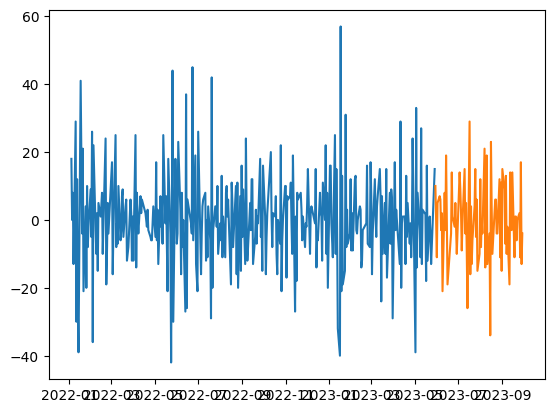

In [70]:
# Seleccionamos el primer 80% para train
train_CC = data1_diff_CC.iloc[:round(len(data1_diff_CC)*.80)]

# Seleccionamos el 20% restante para test
test_CC = data1_diff_CC.iloc[round(len(data1_diff_CC)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_CC, test_CC)

plt.plot(train_CC)
plt.plot(test_CC)


In [89]:
model_CC2 = sm.tsa.arima.ARIMA(train_CC, order=(1,0,4),seasonal_order=(0, 0, 0, 0))
result_CC2 = model_CC2.fit()

result_CC2.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     CC   No. Observations:                  342
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1327.787
Date:                Sat, 04 Nov 2023   AIC                           2669.575
Time:                        20:39:55   BIC                           2696.418
Sample:                             0   HQIC                          2680.269
                                - 342                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0511      0.128     -0.399      0.690      -0.302       0.200
ar.L1         -0.8951      0.059    -15.171      0.000      -1.011      -0.779
ma.L1          0.2712      0.076      3.581      0.000       0.123       0.420
ma.L2         -0.5667      0.060     -9.472      0.000      -0.684      -0.449
ma.L3         -0.1367      0.043     -3.156      0.002      -0.222      -0.052
ma.L4         -0.2221      0.051     -4.363      0.000      -0.322      -0.122
sigma2       137.4841      9.364     14.683      0.000     119.132     155.837
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                37.37
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.28
Prob(H) (two-sided):                  0.70   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Cantidad"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [158]:
predicciones_CC = result_CC2.get_forecast(len(test_CC))

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [159]:
CC_pred = predicciones_CC.predicted_mean
CC_int = predicciones_CC.conf_int()

In [160]:
CC_pred.index = test_CC.index
CC_int.index = test_CC.index

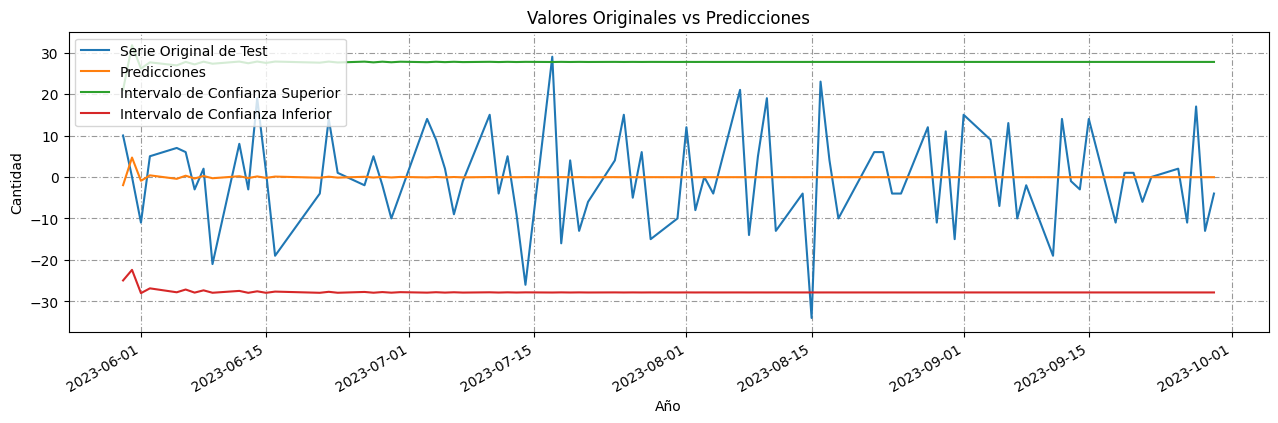

In [162]:
graficar_pred(test_CC, CC_pred, CC_int)

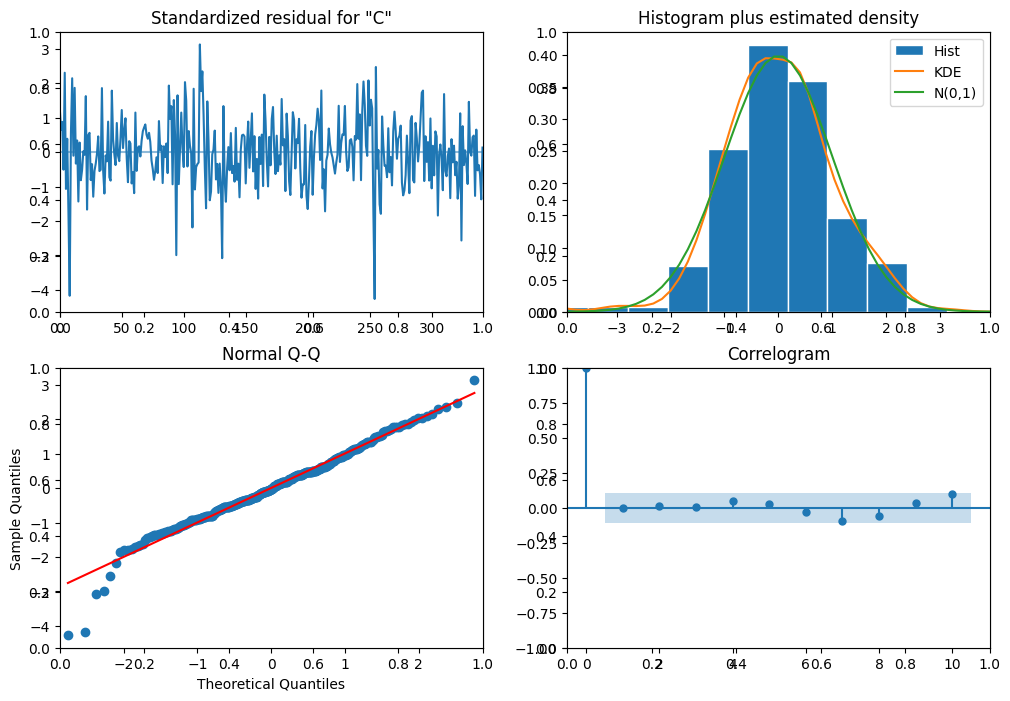

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_CC2.plot_diagnostics(fig=fig)
plt.show()

**WHATSAPP (WAPP)**

FECHA
2022-03-15    19
2022-03-16    12
2022-03-17    14
2022-03-18    67
2022-03-21    45
              ..
2023-06-06    40
2023-06-07    41
2023-06-08    23
2023-06-09    26
2023-06-12    39
Name: WAPP, Length: 304, dtype: int64 FECHA
2023-06-13    44
2023-06-14    40
2023-06-15    26
2023-06-16    23
2023-06-21    51
              ..
2023-09-25    20
2023-09-26    13
2023-09-27    17
2023-09-28    26
2023-09-29    12
Name: WAPP, Length: 76, dtype: int64


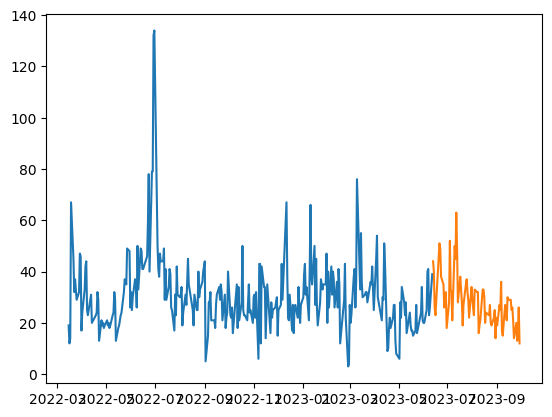

In [129]:
# Seleccionamos el primer 80% para train
train_WAPP = data1["WAPP"][49:].iloc[:round(len(data1["WAPP"][49:])*.80)]

# Seleccionamos el 20% restante para test
test_WAPP = data1["WAPP"][49:].iloc[round(len(data1["WAPP"][49:])*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_WAPP, test_WAPP)

plt.plot(train_WAPP)
plt.plot(test_WAPP)

In [130]:
model_WAPP = sm.tsa.arima.ARIMA(train_WAPP, order=(2,0,1))
result_WAPP = model_WAPP.fit()

result_WAPP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAPP   No. Observations:                  304
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1187.497
Date:                Sat, 04 Nov 2023   AIC                           2384.994
Time:                        20:59:38   BIC                           2403.579
Sample:                             0   HQIC                          2392.429
                                - 304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0680      3.183      9.761      0.000      24.830      37.306
ar.L1          1.2159      0.203      5.998      0.000       0.819       1.613
ar.L2         -0.2879      0.136     -2.113      0.035      -0.555      -0.021
ma.L1         -0.7156      0.196     -3.652      0.000      -1.100      -0.332
sigma2       144.4330      7.142     20.222      0.000     130.435     158.432
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               407.20
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             1.15
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
# Realizar predicciones para el conjunto de prueba
predictions_WAPP = result_WAPP.get_forecast(len(test_WAPP))

# Obtener las predicciones y los intervalos de confianza
WAPP_pred = predictions_WAPP.predicted_mean
WAPP_int = predictions_WAPP.conf_int()

WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


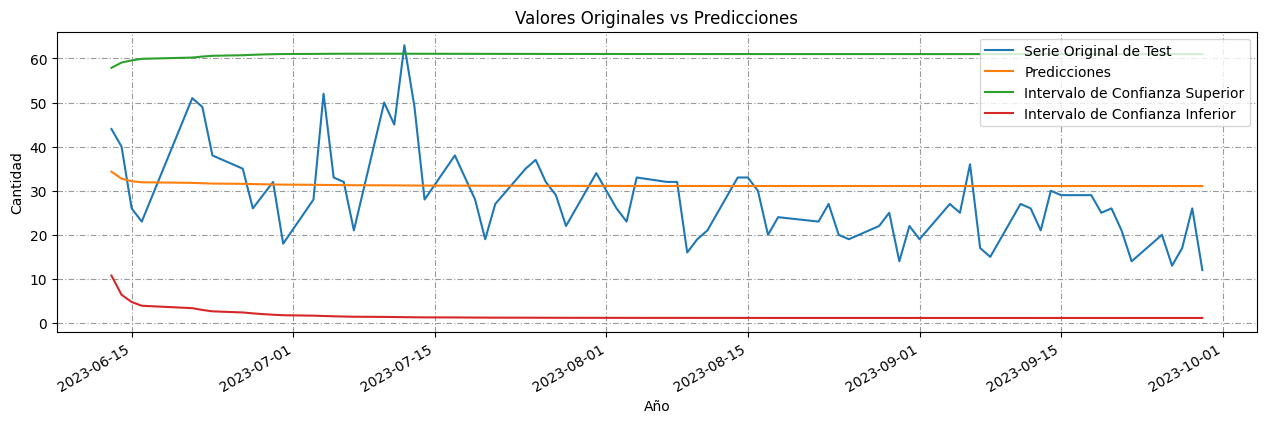

In [132]:
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)

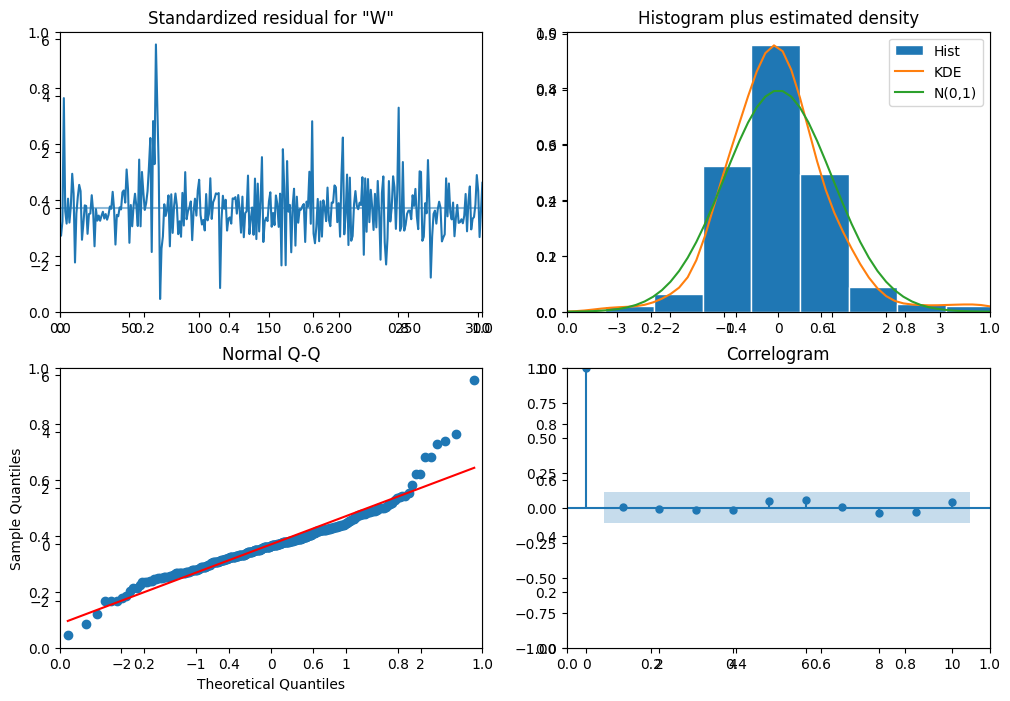

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_WAPP.plot_diagnostics(fig=fig)
plt.show()

---
### **COMPARAR CON OTROS MODELOS**

------
Hacer phillip terron  para ver estacionariedad → ok

Hacer cuadro comparativo de todos los tests → OK

HACER DIFERENCIACION CUANDO CORRESPONDA → OK

REALIZAR DIFERENTES MODELOS SARIMA - AUTO SARIMA. SE PODRIA UTILIZAR EL METODO GRAFICO PARA DETERMINAR EL MODELO PREVIO A USAR AUTOSARIMA

EVALUAR LA METRICA DEL MODELO AIC, HANNA QUINN, ETC PARA VER SI EL MODELO ES BUENO
DESPUES USAMOS AUTO ARIMA Y CONFIRMAMOS

6. EVALUAR PERFORMANCE TRAIN/TEST → MAE, MAPE, RMSE, 

7. COMPARAR CON OTROS MODELOS ESTIMADOS (NAIVE, DRIFT, MEDIAS, O CON OTRO SARIMA)

8. ANALISIS DIAGNOSTICO DEL MODELO (RESIDUOS NORMALIDAD (QQPLOT), HOMOCEDASTICIDAD, ) TEST JAQUE BERA

9. PRONOSTICAR Y LUEGO COMPARAMOS CON EL TEST → 1, 5, 10, 15 Y 30 DIAS PARA PROBAR

10. VAR ??




